### **IST664 Lab 4: Extracting Semantics**

Credit: Dr. Preeti Jagadev and Dr. Jeff Stanton

## Section 4.1

If the end goal of a project is natural language understanding, at some point we must figure out how to associate words, phrases, sentences, and larger structures with the meaning that they convey. Figuring out the meaning of utterances is the goal of semantics. In fact the leading definition of the word semantics is, "the study of the meaning of words" In this lab, we are going to conisder three different approaches to extracting semantics from text.

One of the earliest and most comprehensive efforts to explore semantics on a large scale arose from the work of George Miller at Princeton in the mid-1980s. The database arising from Miller's work, known as WordNet, was an award-winning effort to create a network of interconnected meanings of words. The WordNet project is alive and well in the present day, in fact there is an international organization  known as the Global WordNet Association that continues research and development of WordNet. Check it out here:

http://globalwordnet.org

GWA has an annual conference and offers some databases and documentation to the world community for free. These databases, now covering more than 200 languages, represent a massive amount of collective human effort, which is both amazing and illustrative of the core challenge with such resources: The maintenance of manually developed language resources requires lots of manual labor.

Possibly, some of the value of what WordNet provides has been or will eventually be superceded by approaches based on deep learning. We see inklings of this with GloVe word embedding and more sophisticated embedding approaches such as BERT that are initially trained (in an unsupervised mode) on masses of unlabeled natural language text. Even so, WordNet works (and works fast!) without needing to provide any training data, so there are many applications where it is still an appropriate choice. In this first part of the week 4 lab, we explore some of the WordNet capabilities afforded by NLTK.

In [1]:
import nltk
nltk.download('wordnet') # Colab does not have it installed by default
nltk.download('omw-1.4') # Colab does not have it installed by default
from nltk.corpus import wordnet as wn
type(wn.synsets) # A key function call (method) that we will use

[nltk_data] Downloading package wordnet to C:\Users\Black
[nltk_data]     Knight\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Black
[nltk_data]     Knight\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


method

In [2]:
# Let's start by getting data on the word cat.
# A "synset" is a very basic data structure supported by NLTK that can be used to look up synonyms
# and related information for any word that the WordNet folks have included in the giant database.
syn = wn.synsets('cat')
type(syn), len(syn)

(list, 10)

In [3]:
# The output above shows that the return data structure has 10 elements in a list.
# What are these different list elements?
[type(s) for s in syn]

[nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset]

In [4]:
# Each element in the list is a synset object.
cat0 = syn[0] # Let's look at some of the details for the first synset
print ("Synset name :  ", cat0.name())

# Defining the word
print ("\nSynset meaning : ", cat0.definition())

# list of phrases that use the word in context; not all words have these
print ("\nSynset example : ", cat0.examples())

Synset name :   cat.n.01

Synset meaning :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats

Synset example :  []


In [5]:
print ("Synset name :  ", cat0.name()) # Let's show the name again

# Here is the "root" word, the highest level hypernym
print ("\nSynset root hypernym:  ", cat0.root_hypernyms())

# These are the more general terms
print ("\nSynset hypernyms:  ", cat0.hypernyms())

# These are the more specific terms
print ("\nSynset hyponyms:  ", cat0.hyponyms())

Synset name :   cat.n.01

Synset root hypernym:   [Synset('entity.n.01')]

Synset hypernyms:   [Synset('feline.n.01')]

Synset hyponyms:   [Synset('domestic_cat.n.01'), Synset('wildcat.n.03')]


In the first line of code below, we extract the second element of the synset list. Use it to show the name, definition, example, root hypernym, hypernyms, and hyponyms for this first synonym of cat.

In [6]:
# Exercises: Explore the second synset for "cat."
# Create a new block of code for each of the following exercises.

cat1 = syn[1] # Let's look at some of the details for the second element

# Question 4.1: Print the name of cat1: What part of speech is it?
print ("Synset name :  ", cat1.name())
print ("\nSynset Part of Speech  : ", cat1.pos())

# Question 4.2: Print the definition of cat1
print ("\nSynset meaning : ", cat1.definition())

# Question 4.3: Print the examples of use of cat1 in context
print ("\nSynset example : ", cat1.examples())

# Question 4.4: Print the root hypernym of cat1
print ("\nSynset root hypernym:  ", cat1.root_hypernyms())

# Question 4.5: Print a list of hypernyms of cat1
print ("\nSynset hypernyms:  ", cat1.hypernyms())

# Question 4.6: Print a list of hyponyms of cat1
print ("\nSynset hyponyms:  ", cat1.hyponyms())

Synset name :   guy.n.01

Synset Part of Speech  :  n

Synset meaning :  an informal term for a youth or man

Synset example :  ['a nice guy', "the guy's only doing it for some doll"]

Synset root hypernym:   [Synset('entity.n.01')]

Synset hypernyms:   [Synset('man.n.01')]

Synset hyponyms:   [Synset('sod.n.04')]


## Section 4.2

In [7]:
# Cat is such a common word in English that it has been reused to refer to many different kinds of things.
# Let's go back to the complete list to show all of the definitions:
[s.definition() for s in syn]

['feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats',
 'an informal term for a youth or man',
 'a spiteful woman gossip',
 'the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant',
 'a whip with nine knotted cords',
 'a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work',
 'any of several large cats typically able to roar and living in the wild',
 'a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis',
 "beat with a cat-o'-nine-tails",
 'eject the contents of the stomach through the mouth']

In [8]:
# That's an amazing variety.
# Let's also glue the corresponding synset name to the definition so that we can see the parts of speech and numbering.
[ (s.name(), s.definition())  for s in syn]

[('cat.n.01',
  'feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats'),
 ('guy.n.01', 'an informal term for a youth or man'),
 ('cat.n.03', 'a spiteful woman gossip'),
 ('kat.n.01',
  'the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant'),
 ("cat-o'-nine-tails.n.01", 'a whip with nine knotted cords'),
 ('caterpillar.n.02',
  'a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work'),
 ('big_cat.n.01',
  'any of several large cats typically able to roar and living in the wild'),
 ('computerized_tomography.n.01',
  'a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis'),
 ('cat.v.01', "beat with a cat-o'-nine-tails"),
 ('vomit.v.01', 'eject the contents of the stomach through the mouth')]

In [9]:
# We can also get lemmas for each synonym entry in our list of 10:
[ (s.name(), s.lemma_names())  for s in syn]

[('cat.n.01', ['cat', 'true_cat']),
 ('guy.n.01', ['guy', 'cat', 'hombre', 'bozo']),
 ('cat.n.03', ['cat']),
 ('kat.n.01',
  ['kat', 'khat', 'qat', 'quat', 'cat', 'Arabian_tea', 'African_tea']),
 ("cat-o'-nine-tails.n.01", ["cat-o'-nine-tails", 'cat']),
 ('caterpillar.n.02', ['Caterpillar', 'cat']),
 ('big_cat.n.01', ['big_cat', 'cat']),
 ('computerized_tomography.n.01',
  ['computerized_tomography',
   'computed_tomography',
   'CT',
   'computerized_axial_tomography',
   'computed_axial_tomography',
   'CAT']),
 ('cat.v.01', ['cat']),
 ('vomit.v.01',
  ['vomit',
   'vomit_up',
   'purge',
   'cast',
   'sick',
   'cat',
   'be_sick',
   'disgorge',
   'regorge',
   'retch',
   'puke',
   'barf',
   'spew',
   'spue',
   'chuck',
   'upchuck',
   'honk',
   'regurgitate',
   'throw_up'])]

In [10]:
[s.lemma_names()[0] for s in syn]

['cat',
 'guy',
 'cat',
 'kat',
 "cat-o'-nine-tails",
 'Caterpillar',
 'big_cat',
 'computerized_tomography',
 'cat',
 'vomit']

In [11]:
# Question 4.7: Now repeat the process by finding the synset for an adjectival word of your choice.
syn = wn.synsets('chicken')
[s.definition() for s in syn]



['the flesh of a chicken used for food',
 'a domestic fowl bred for flesh or eggs; believed to have been developed from the red jungle fowl',
 'a person who lacks confidence, is irresolute and wishy-washy',
 'a foolhardy competition; a dangerous activity that is continued until one competitor becomes afraid and stops',
 'easily frightened']

In [12]:
# Solution

chck = syn[2] # Let's look at some of the details for the second element

print ("Synset name :  ", chck.name())
print ("\nSynset Part of Speech  : ", chck.pos())

print ("\nSynset meaning : ", chck.definition())

print ("\nSynset example : ", chck.examples())

print ("\nSynset root hypernym:  ", chck.root_hypernyms())

print ("\nSynset hypernyms:  ", chck.hypernyms())

print ("\nSynset hyponyms:  ", chck.hyponyms())

Synset name :   wimp.n.01

Synset Part of Speech  :  n

Synset meaning :  a person who lacks confidence, is irresolute and wishy-washy

Synset example :  []

Synset root hypernym:   [Synset('entity.n.01')]

Synset hypernyms:   [Synset('weakling.n.01')]

Synset hyponyms:   []


In [13]:
# Show the list of lemma_names for that word.
[ (s.name(), s.lemma_names())  for s in syn]

[('chicken.n.01', ['chicken', 'poulet', 'volaille']),
 ('chicken.n.02', ['chicken', 'Gallus_gallus']),
 ('wimp.n.01', ['wimp', 'chicken', 'crybaby']),
 ('chicken.n.04', ['chicken']),
 ('chicken.s.01',
  ['chicken',
   'chickenhearted',
   'lily-livered',
   'white-livered',
   'yellow',
   'yellow-bellied'])]

In [14]:
# As a related task, reduce that list of lemma names to its unique set in order to eliminate duplicates.

lemma_name = [name for s in syn for name in s.lemma_names()]
chicken_lemmas = set(lemma_name)
print(chicken_lemmas)

{'lily-livered', 'white-livered', 'crybaby', 'Gallus_gallus', 'chickenhearted', 'wimp', 'yellow', 'chicken', 'volaille', 'yellow-bellied', 'poulet'}


In [15]:
# There are a couple more useful things we can do with a synset.
from tabulate import tabulate # To make a neat table
takesyn = wn.synsets('take') # The word "take" has many senses - noun and verb
poslist = [(s.lemma_names()[0], s.pos(), s.definition()) for s in takesyn]
print(tabulate(poslist,  headers=["Word", "POS", "Definition"]))

Word         POS    Definition
-----------  -----  ----------------------------------------------------------------------------------------------
return       n      the income or profit arising from such transactions as the sale of land or other property
take         n      the act of photographing a scene or part of a scene without interruption
take         v      carry out
take         v      require (time or space)
lead         v      take somebody somewhere
take         v      get into one's hands, take physically
assume       v      take on a certain form, attribute, or aspect
take         v      interpret something in a certain way; convey a particular meaning or impression
bring        v      take something or somebody with oneself somewhere
take         v      take into one's possession
take         v      travel or go by means of a certain kind of transportation, or a certain route
choose       v      pick out, select, or choose from a number of alternatives
accept       v   

In [16]:
birdsyn = wn.synset('bird.n.01')
goatsyn = wn.synset('goat.n.01')
sheepsyn = wn.synset('sheep.n.01')
birdsyn.path_similarity(goatsyn)

0.1111111111111111

In [17]:
birdsyn.path_similarity(sheepsyn)

0.1111111111111111

In [18]:
goatsyn.path_similarity(sheepsyn)

0.3333333333333333

In [19]:
# Leacock-Chodorow similarity also uses the path lengths, but also considers how deep the least common ancestor is in the hierarchy.
# Resnik similarity also considers the relative frequency of a word in a  corpus you provide.
# We show the earlier value of path similarity here justfor the sake of comparison.
nltk.download('wordnet_ic')
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')
birdsyn.path_similarity(goatsyn), birdsyn.lch_similarity(goatsyn), birdsyn.res_similarity(goatsyn, brown_ic)

[nltk_data] Downloading package wordnet_ic to C:\Users\Black
[nltk_data]     Knight\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!


(0.1111111111111111, 1.4403615823901665, 5.2175784741185165)

In [20]:
# Question 4.8: Add code to produce the Leacock-Chodorow and the Resnick similarity for sheepsyn to goatsyn
# Solution

sheepsyn.path_similarity(goatsyn), sheepsyn.lch_similarity(goatsyn), sheepsyn.res_similarity(goatsyn, brown_ic)

(0.3333333333333333, 2.538973871058276, 8.005695458684853)

In [21]:
# Antonyms: If we want to find a word with the opposite meaning, WordNet can provide us with choices:
syn = wn.synsets('good') # Grab all of the synonyms for good
[(s.name(), s.definition()) for s in syn] # Display them

[('good.n.01', 'benefit'),
 ('good.n.02', 'moral excellence or admirableness'),
 ('good.n.03', 'that which is pleasing or valuable or useful'),
 ('commodity.n.01', 'articles of commerce'),
 ('good.a.01',
  'having desirable or positive qualities especially those suitable for a thing specified'),
 ('full.s.04', 'having the normally expected amount'),
 ('good.a.03', 'morally admirable'),
 ('estimable.s.01', 'deserving of esteem and respect'),
 ('beneficial.s.01', 'promoting or enhancing well-being'),
 ('good.s.04', 'agreeable or pleasing'),
 ('good.s.05', 'of moral excellence'),
 ('adept.s.01', 'having or showing knowledge and skill and aptitude'),
 ('good.s.07', 'thorough'),
 ('dear.s.02', 'with or in a close or intimate relationship'),
 ('dependable.s.03', 'financially sound'),
 ('good.s.10', 'most suitable or right for a particular purpose'),
 ('good.s.11', 'resulting favorably'),
 ('effective.s.03', 'exerting force or influence'),
 ('good.s.13', 'capable of pleasing'),
 ('good.s.14',

In [22]:
goodsyn = wn.synset('good.a.01')
[l.antonyms() for l in goodsyn.lemmas()]

[[Lemma('bad.a.01.bad')]]

In [23]:
# Question 4.9: Now look up the antonym(s) for the adjectival sense of bad.

# Solution
syn = wn.synsets('bad') # Grab all of the synonyms for good

badsyn = wn.synset('bad.a.01')
[l.antonyms() for l in badsyn.lemmas()]

[[Lemma('good.a.01.good')]]

## Section 4.3:

Lets look at a way that we could use the structure of WordNet to get at different forms of sentiment. Let's start simple and then work our way to some more complex options.

In [24]:
# First, we need a dataset to work on.
# Anything with some comments and a sentiment indicator will do.
# This URL refers to a project on Github that Dennis Pan posted.
# If the URL is unavailable, find another CSV file with text comments and a sentiment score.
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/dennisypan/Quick-N-Dirty-Sentiment-Analysis/master/sentiment_on_business.csv")
print(list(data)) # Show column names

['Unnamed: 0', 'Business', 'Comments', 'Rating', 'Sentiment Label', 'Sentiment Score', 'URL']


In [25]:
# We will be examining the Comments for hints about sentiment along with Sentiment Label and Sentiment Score,
# which were set up by the creator of the dataset to help with machine learning tasks.
# Show the number of rows and columns in this data set
data.shape

(70, 7)

In [26]:
# View a few comments. Note that the name of this data field ('Comments') is peculiar to the Dennis Pan Yelp/Sushi data.
# If you change the dataset, you may need to change the name of the field where the comments are found.
data['Comments'][0:5]

0    Boyfriend and I ordered togo sushi and picked ...
1    I am pleased to recommend this restaurant in S...
2    great food been going to japan town since i wa...
3    Small sushi boat restaurant located in SJ Japa...
4    Sushi Maru is one of the many gems of SJ's Jap...
Name: Comments, dtype: object

In [27]:
# We know that the word "good" has many senses, but they are generally all positive as we saw in the WordNet work above.
# What if we just find all the comments where a good-related word appears in the text?
# Would that tell us anything about sentiment?
# First, let's see if we can just match one word
for g in data['Comments']:
  if 'good' in g.lower():
    print(g)

I am pleased to recommend this restaurant in San Jose's "Japantown"right next door to Union Bank. The restaurant is quite popular and fills up at lunchtime.  The service is fast and friendly.   There is a sushi-boat bar for those who are so inclined as it is definitely well-liked.  The booths are spacious and comfortable.  The  luncheon menu  is somewhat limited. Their tempura appetizer is really remarkable, both in taste and price, ample and affordable.  I was slightly disappointed in their salad dressing.  It's usually so good in Japanese restaurants. The restaurant is clean as is the ladies' room. Parking is not a problem. There is both street (metered) and lot parking.
Sushi Maru is one of the many gems of SJ's Japan town. They have a rotating sushi belt, but also a solid menu of entrees as well as individual nigiri and hand roll options. My friend and I both ordered the Chef's sushi special and some hot sake- the toro and salmon belly with skin were to DIE for. It was a great way 

In [28]:
# Now look for good AND all of its synonyms. Notice the use of set().
lemmas = set([s.lemma_names()[0] for s in wn.synsets('good')])

# This is going to be a longer list, so let's just count the matches for now rather than printing them all.
matches = 0

for g in data['Comments']:
  for l in lemmas:
    if l in g.lower():
      matches += 1

print(matches)

44


In [29]:
# That's useful: We got a lot of mentions of all good-related words in the 70 comments stored in this dataset.
# This time we will count how many matches we get per comment.

lemmas = set([s.lemma_names()[0] for s in wn.synsets('good')])

# Here we will assign matches into a list containing 70 elements
matches = [0] * data.shape[0] # Fill a list with 70 zeroes

# This loop uses an enumerator, which is a cool Python solution to a common programming problem.
# The "i" that the enumerator produces is the index of the corresponding g.
# In this case the "g"s are the comments extracted from each successive row.
for i, g in enumerate(data['Comments']): # Loop over all comments
  for l in lemmas:  # Loop over all lemmas of good
    if l in g.lower(): # If we get a match, increment the count
      matches[i] += 1

len(matches) # We should have 70 entries

70

(array([35.,  0.,  0., 27.,  0.,  0.,  7.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

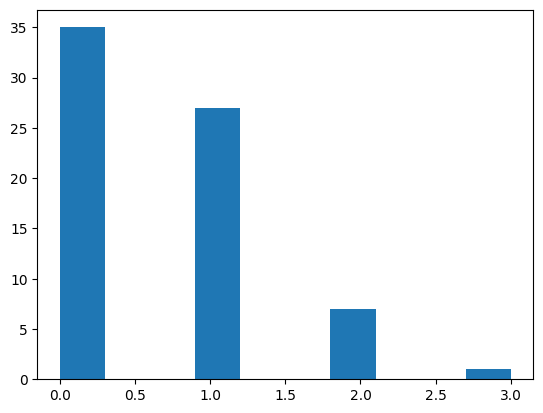

In [30]:
# What's the distribution of counts
import matplotlib.pyplot as plt
plt.hist(matches)

#Section 4.4


In [31]:
# Let's use pandas to calculate the simple Pearson's correlation between the sentiment score in the data set and the count of good-related words.
x = pd.Series(data['Sentiment Score'])
y = pd.Series(matches)
x.corr(y)

np.float64(0.12068240259212179)

In [32]:
# What if we used the wordbad instead of the word good. Would that make any difference?

# Question 4.10: Copy the loop from four blocks above and change from good to bad

lemmas = set([s.lemma_names()[0] for s in wn.synsets('bad')])

# This is going to be a longer list, so let's just count the matches for now rather than printing them all.
matches = 0

for g in data['Comments']:
  for l in lemmas:
    if l in g.lower():
      matches += 1

print(matches)

3


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <BarContainer object of 10 artists>)

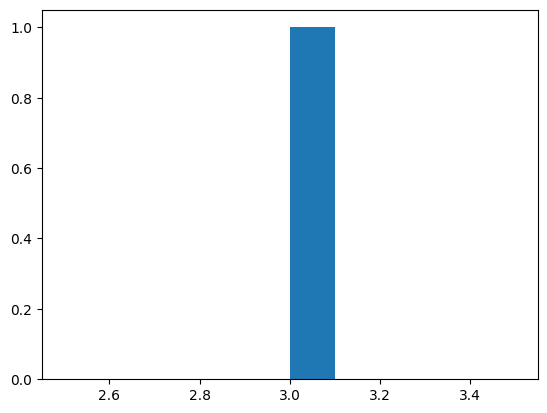

In [33]:
# Question 4.11: Create a histogram of matches
# Question 4.12: Write a comment interpreting the histogram
# most of the lemmas are for the 3rd meaning of the word bad

import matplotlib.pyplot as plt
plt.hist(matches)

In [34]:
# Question 4.13: Calculate the correlation between Sentiment Score and matches
 
x = pd.Series(data['Sentiment Score'])
y = pd.Series(matches)
x.corr(y)

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


np.float64(nan)

## Linear Discriminant Analysis

We are going to divide the dataset into two groups: A positive group and a negative group, and then find out to what degree each word functions differently in those two groups.


In [35]:
# To perform the LDA calculation, we need a TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

# We're keeping it simple for now, no special preprocessing.
tfidfingest = TfidfVectorizer(tokenizer=casual_tokenize)
type(tfidfingest)

sklearn.feature_extraction.text.TfidfVectorizer

In [36]:
# Now we have the tool we need to create the TF-IDF matrix:
tfidfmatrix = tfidfingest.fit_transform(raw_documents=data['Comments']).toarray()
tfidfmatrix.shape, type(tfidfmatrix)

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((70, 1254), numpy.ndarray)

In [37]:
# Remember that an array in numpy is a matrix-like object containing values all of the same type.
# What's in our array?
tfidfmatrix[:10,:5] # Just the first ten rows and five columns

array([[0.11255423, 0.        , 0.053985  , 0.        , 0.        ],
       [0.        , 0.15665963, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.22535615, 0.        , 0.0540444 , 0.        , 0.07541902],
       [0.0478254 , 0.        , 0.20644883, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.15721287, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [38]:
# Typical sparse array: Mostly zeroes.
# The non-zero values are fractional, showing that this is TF-IDF and not an array of simple counts.
# Now let's subdivide our original dataset based on whether each row was classed as a positive or negative comment.
# Here we are creating what Python programmers sometimes call a "mask."
# The first mask will let us select the positive cases. The second mask will let us select the negative cases.
classlist = [(c=="Positive" or c=="Neutral") for c in data['Sentiment Label']] # Positive mask
notclasslist = [not c for c in classlist] # Negative mask
print(classlist[:8]) # Compare the first 8 results from the two masks
print(notclasslist[:8]) # Entries in these two lists should be boolean inverses

[True, True, True, False, True, True, True, False]
[False, False, False, True, False, False, False, True]


In [39]:
# We can use the masks to select the cases we want and the mean method to summarize our tfidf for each subset of the data
# Centroid means "a point in space that is in the middle of a bunch of other points"
poscentroid = tfidfmatrix[classlist].mean(axis=0)
negcentroid = tfidfmatrix[notclasslist].mean(axis=0)
separator = poscentroid - negcentroid # The difference in means for each word
separator

array([ 0.05894595, -0.11399296,  0.01746025, ...,  0.00252529,
        0.00154828,  0.01642816], shape=(1254,))

In [40]:
# Now let's take our separator and put it together in a little dataset with the list of tokens, so we can see what's going on.
wordsent = pd.DataFrame({
    "Token":list(tfidfingest.get_feature_names_out()),
    "Sentiment":list(separator)
})
# Here we sort the cases from lowest to highest, based on the value that we took from separator.
wordsent.sort_values(by=['Sentiment'], inplace=True)
wordsent.shape, list(wordsent) # Summarize our data frame

((1254, 2), ['Token', 'Sentiment'])

In [41]:
# After sorting, the "most negative" words are at the beginning of the data frame and the "most positive" words are at the end.
wordsent.head(15) # Give us 15 words that are most negative

,Token,Sentiment
1,"""",-0.113993
1076,the,-0.050822
1214,which,-0.048907
200,but,-0.047988
948,she,-0.044887
436,fish,-0.044311
87,alright,-0.043009
78,agedashi,-0.043009
1104,tofu,-0.043009
425,few,-0.042864


In [42]:
wordsent.tail(15) # Give us 15 words that are most positive

,Token,Sentiment
161,best,0.021562
1074,that,0.021747
312,delicious,0.021767
806,place,0.022676
252,come,0.022697
209,can,0.024593
1101,to,0.024680
761,order,0.025505
1033,sushi,0.027182
491,great,0.027710


Well, remember that this is a really small dataset and we did not make the effort to filter out stop words or punctuation. Still, there's some interesting stuff in there, and we've shown how with a few simple steps, we can create a kind of "empirical" sentiment value for each word.

The next step also uses a cool matrix math trick. By creating *dot products* of the separator vector with the TF-IDF vector for each of our 70 comments, we can summarize the similarity/distance of a given comment from the dividing structure. Maybe the resulting document scores will be useful for something.

In [43]:
docusent = tfidfmatrix.dot(separator)
docusent

array([ 0.03190957,  0.00489625,  0.02053524, -0.1131945 ,  0.0068361 ,
        0.03714363,  0.05276984, -0.1372704 ,  0.01527414,  0.04051255,
       -0.13587406,  0.03995574,  0.00276345, -0.00473419,  0.03760517,
        0.02651981,  0.06201844,  0.00034177, -0.01263898,  0.03052205,
        0.02293302,  0.0197362 , -0.13294862,  0.02436511,  0.03068126,
        0.01019862,  0.00424415,  0.01116213,  0.04171756,  0.03642798,
        0.03830759,  0.0108454 ,  0.04254235,  0.00893868,  0.03582491,
        0.03351333,  0.03417034,  0.03088434, -0.00089552,  0.04566911,
        0.04567206,  0.05179615,  0.03851501,  0.04892801,  0.03642214,
        0.02451584,  0.03657144,  0.03245421, -0.12116866,  0.01874153,
        0.02458296, -0.00526663,  0.04728941,  0.0562507 ,  0.03587462,
        0.04009349, -0.12562397,  0.0534958 ,  0.02060276,  0.02848552,
        0.03458464,  0.04533432,  0.04616221,  0.01689287,  0.02849751,
        0.0065034 ,  0.02493422, -0.01567791,  0.05086638,  0.02

In [44]:
x = pd.Series(data['Sentiment Score']) # Here's the sentiment score from the data
y = pd.Series(docusent) # Here's our calculated separation of each document from the divider
x.corr(y).round(3)

np.float64(0.618)

## Latent Dirichlet Allocation


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(min_df=2, max_df=0.9,
                          tokenizer=casual_tokenize, stop_words='english')
countmatrix = counter.fit_transform(raw_documents=data['Comments']).toarray()
countmatrix.shape, type(countmatrix) # Rows? Columns? Type?

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((70, 408), numpy.ndarray)

In [46]:
# When we want to do calculations or transformations on a sparse matrix, we usually need to convert it to a data frame first.

import pandas as pd
countdf = pd.DataFrame(countmatrix, columns=counter.get_feature_names_out())
countdf.shape, type(countdf)

((70, 408), pandas.core.frame.DataFrame)

In [47]:
# Question 4.14: Take a look at the first few rows of the data frame using the head() method.
# Solution
countdf.head()

,!,"""",$,%,&,',(,),",",-,...,white,won't,work,worst,worth,wouldn't,wrong,years,you're,yummy
0,3,0,1,0,0,0,4,4,4,4,...,0,0,0,0,0,0,1,0,0,0
1,0,2,0,0,0,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,4,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# Sci-Kit learn has a Latent Dirichlet Allocation fitting algorithm that we can use.
from sklearn.decomposition import LatentDirichletAllocation as LDIA
from numpy import random as rnd
rnd.seed(123)

numtopics = 9 # Later on you will change this as an exercise.

# Create an instance of the LDIA analyzer
ldiamodel = LDIA(n_components=numtopics, learning_method='batch')

# Provide the pandas data frame of word counts for it to work on
ldiamodel = ldiamodel.fit(countdf)

ldiamodel.components_.shape # What is the resulting data frame like?

(9, 408)

In [49]:
# Each row repesents one topic, and each entry in a row pertains to one of the terms in our count matrix.
# Let's examine just the first five entries in each row.
# Remember that these are pseudocounts and not probability values.
ldiamodel.components_[:numtopics,:5]

array([[ 1.11107766,  4.11114844,  1.11109594,  0.11111111,  0.11111111],
       [ 0.11125124,  0.11111111,  0.97980161,  0.11111111,  1.11112435],
       [ 0.11111899,  2.11111287,  2.11111606,  0.11111111,  0.11111111],
       [ 9.89858297,  0.11111111,  1.60645729,  0.11111111,  0.87929276],
       [ 0.11111112,  0.11111112,  0.11111112,  0.11111112,  0.11111112],
       [ 7.64300236, 20.11106664,  7.44997875,  1.11111118,  0.11111111],
       [42.79141612,  0.11111648,  2.40814966,  1.11111101,  1.34291621],
       [ 3.11128055,  0.11111112,  0.11111112,  0.11111112,  0.11111112],
       [ 2.11115898,  0.11111111,  2.11117846,  0.11111112,  0.11111111]])

In [50]:
# Here's a function for showing the top ten words for each topic.
# This was adapted from an example in the SciKit Learn documentation.
# The model is the fitted model, the vectorizer is the initalized instance of the count vectorizer, and
# top_words sets how many of the most influential words you want to see.
def selected_topics(model, vectorizer, top_words=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx)) # One of these headers for each topic

        # This uses a list comprehension to iterate over the words
        # in each topic, picking out the highest coefficient values.
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_words - 1:-1]])

In [51]:
# Here we call our function
selected_topics(ldiamodel, counter, top_words=10)

Topic 0:
[(',', np.float64(15.111341076976649)), ('sushi', np.float64(12.111324065910685)), ("it's", np.float64(6.111247105085878)), ('food', np.float64(5.111233201946385)), ('good', np.float64(5.111230365526831)), ('place', np.float64(4.111215047432107)), ('japanese', np.float64(4.111196331523579)), ("don't", np.float64(4.111171989763613)), ('"', np.float64(4.111148437552365)), ('little', np.float64(3.111220809173756))]
Topic 1:
[('sushi', np.float64(7.725661982034618)), ('order', np.float64(6.08071357385364)), (',', np.float64(4.972983349706629)), ('-', np.float64(4.111152733351147)), ('roll', np.float64(3.98315351449739)), (')', np.float64(3.8119383014187473)), ('(', np.float64(3.805807435608722)), ('dinner', np.float64(3.089288756356988)), ('belt', np.float64(3.022295193858417)), ('bar', np.float64(2.9186287763305208))]
Topic 2:
[('sushi', np.float64(9.76940533760243)), (',', np.float64(6.328024454704488)), ('fresh', np.float64(5.111216601182591)), ('food', np.float64(4.29109728345

When we look at the output above, we see that if two words in a topic both have high values, it means they often appear together in the same documents. If we ignore punctuation and just look at the words, we can notice natural connections. For example, even if someone doesn’t know that sushi is a type of food, they could guess it, because sushi and food show up together in several topics.

Earlier, when we used **linear discriminant analysis with TF-IDF**, we only got a very broad sense of sentiment (positive vs. negative) by checking which words were important in different groups of text.

But now, this method gives us a richer picture: it shows which words usually appear together, and from that, it builds groups of related words (topics).

This is based on the **distributional hypothesis:** words that are related in meaning tend to appear near each other in text.

However, the connections between words and topics are just one part of the story. We also need to know the connections between topics and documents. In other words, we want to see which topics show up in which comments.

Scikit-learn can give us this information using the **.transform()** method on our **document-term matrix**.

**The result will be:**
The same number of rows as comments (because each row = one document, and the same number of columns as topics (because each column = one topic).


In [52]:
# Use transform() to get the topic vectors.
# We should have one vector for each document in our sushi data.
topicvectors = ldiamodel.transform(X=countmatrix)
topicvectors.shape, type(topicvectors)

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


((70, 9), numpy.ndarray)

In [53]:
# Let's see the coefficients for the first 10 rows in our sushi data
print(topicvectors[0:10,:].round(4))

[[0.0015 0.8206 0.0015 0.0015 0.0015 0.0015 0.1691 0.0015 0.0015]
 [0.0022 0.0022 0.0022 0.0022 0.0022 0.6663 0.3185 0.0022 0.0022]
 [0.0093 0.0093 0.0093 0.0093 0.0093 0.0093 0.9259 0.0093 0.0093]
 [0.0026 0.0026 0.0026 0.9793 0.0026 0.0026 0.0026 0.0026 0.0026]
 [0.0021 0.0021 0.0021 0.0021 0.0021 0.9832 0.0021 0.0021 0.0021]
 [0.0016 0.0016 0.0016 0.0016 0.0016 0.0016 0.9871 0.0016 0.0016]
 [0.0018 0.0018 0.0018 0.2545 0.0018 0.7327 0.0018 0.0018 0.0018]
 [0.0058 0.0058 0.0059 0.0059 0.0058 0.9532 0.0059 0.0058 0.0059]
 [0.0018 0.0018 0.0018 0.0018 0.0018 0.9859 0.0018 0.0018 0.0018]
 [0.0015 0.0015 0.0015 0.0015 0.0015 0.9878 0.0015 0.0015 0.0015]]


Make sure to scan each row in the output above. Generally, each document will load most heavily on just one of the modeled topics. So in each row there should be a lot of very small numbers and one larger number in the range of 0.80 up to 0.99. If you see a row that has two or more "mid-sized" numbers, it means that the document in question could not be easily "assigned" to just one topic.

In [54]:
# Each of those rows is a probability vector and therefore each row should sum to 1 (within rounding error).
# As probabilities they represent the strength of "attachment" for each of our topics to each of our documents.
# Just as a diagnostic, let's check this assumption.
print( [ round(tv.sum(),1) for tv in topicvectors] )

[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.

We have topic vectors = Numbers that show how much each document belongs to each topic.

Some topics are probably linked to sentiment (positive or negative feeling).

**Example:**

Topic with words like good, sushi, friendly, service → likely positive.

Topic with words like bad, slow, rude → likely negative.

Now, to test this idea:

We use a simple method called **ordinary least squares (OLS) regression.**

This method tries to see:
“If I know the topic values for a document, can I predict its sentiment score?”

In very simple words:
We are checking whether certain topics (word groups) are good at predicting whether a review is positive or negative.

In [55]:
# We will use OLS regression from sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression() # Create an instance of the class
reg.fit(topicvectors[:,0:numtopics], data['Sentiment Score'])
sentpred = reg.predict(topicvectors[:,0:numtopics])
x = pd.Series(data['Sentiment Score'])
y = pd.Series(sentpred)
x.corr(y)

np.float64(0.5683062551922707)

In [56]:
reg.coef_

array([-0.08680103, -0.0502043 , -0.03314594,  0.00835262,  0.43663825,
       -0.22528869,  0.0213544 ,  0.01771591, -0.08862122])

In [57]:
# Question 4.15:
# Use an enumerator to find the documents where Topic 4 represented a probability value larger than 0.90.
# Print out the comment corresponding to that document

# Solution
for idx, tv in enumerate(topicvectors): #start of code, now continue from here.
    if tv[3] > 0.90:
        print(f"Document Index: {idx}, Probability: {tv[3]:.2f}")
        print(f"Comment: {data['Comments'][idx]}")



Document Index: 3, Probability: 0.98
Comment: Small sushi boat restaurant located in SJ Japantown. Sushi Maru looks a bit outdated but their food is pretty decent. I ordered a bowl of agedashi tofu and my mom ordered their chicken terriyaki lunch. The agedashi tofu was decent, definitely could be slightly crispier but the flavors were alright. We also grabbed a few plates off the sushi belt and they were decent but they were a tad pricey for okay quality.  Overall this place is alright. It's not high on my list to revisit but if i'm in the area, i'll probably try it out again.
Document Index: 23, Probability: 0.96
Comment: So yummy here, we where here on Christmas Eve. And we wanted sushi, thank good it was open that day. Service was great, food was excellent and the employees where up to beat. I can't wait to eat here again. The bento  box was enough food for us to share.. we also got some sushi and oysters at the bar to keep us full. Hot tea is always a bonus..
Document Index: 43, Pr

In [58]:
# Question 4.16:
# Include an if statement in this for loop to test the probability value for Topic 4 in this particular row

# Solution

In [59]:
# Question 4.17: Inside the if statement, use idx as the row slicer to get the 'Comment' field from the original data set. Print that comment.

# Solution

In [60]:
# Question 4.18:
# Go back to where numtopics is set and change to the next highest integer.
# Rerun the code from there down to here.
# Interpret the results.
# Is this new number of topics a better choice? Why or why not?

# Solution


numtopics = 10 # Later on you will change this as an exercise.

# Create an instance of the LDIA analyzer
ldiamodel = LDIA(n_components=numtopics, learning_method='batch')

# Provide the pandas data frame of word counts for it to work on
ldiamodel = ldiamodel.fit(countdf)

ldiamodel.components_.shape # What is the resulting data frame like?

(10, 408)

In [61]:
ldiamodel.components_[:numtopics,:5]
selected_topics(ldiamodel, counter, top_words=10)
topicvectors = ldiamodel.transform(X=countmatrix)
topicvectors.shape, type(topicvectors)
print(topicvectors[0:10,:].round(4))
print( [ round(tv.sum(),1) for tv in topicvectors] )
# We will use OLS regression from sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression() # Create an instance of the class
reg.fit(topicvectors[:,0:numtopics], data['Sentiment Score'])
sentpred = reg.predict(topicvectors[:,0:numtopics])
x = pd.Series(data['Sentiment Score'])
y = pd.Series(sentpred)
x.corr(y)
reg.coef_
for idx, tv in enumerate(topicvectors): #start of code, now continue from here.
    if tv[3] > 0.90:
        print(f"Document Index: {idx}, Probability: {tv[3]:.2f}")
        print(f"Comment: {data['Comments'][idx]}")



Topic 0:
[('booth', np.float64(6.069795908289698)), ('sushi', np.float64(5.585392628658739)), ('bar', np.float64(5.198959810083399)), ('order', np.float64(5.100044108618672)), ('?', np.float64(5.079942470561786)), ('place', np.float64(4.786174667567146)), ('food', np.float64(4.100053657341722)), ('!', np.float64(3.1514869272308874)), ('fresh', np.float64(2.8245233462386476)), ('conveyor', np.float64(2.7649630264575733))]
Topic 1:
[('food', np.float64(10.623078433424167)), (',', np.float64(8.888997209058118)), ('!', np.float64(8.100012597324007)), ('sushi', np.float64(7.100032051512819)), ('lunch', np.float64(5.146829915436471)), ('time', np.float64(4.796485284954928)), ('good', np.float64(4.1000205688136795)), ('japanese', np.float64(4.100018301814213)), ('come', np.float64(4.100017104106963)), ('tasted', np.float64(4.055866774902506))]
Topic 2:
[(',', np.float64(10.100052163793213)), ('sushi', np.float64(8.100059498388168)), ('!', np.float64(6.100015537521612)), ('roll', np.float64(5.

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


In [62]:
# Question 4.19:
# Experimentation with the number of topics, take two.
# Go back to where numtopics is set and change it to a small value such as three or five.
# Rerun the code from there down to here.
# Interpret the results.
# Is this new number of topics a better choice? Why or why not?

In [63]:

numtopics = 5 # Later on you will change this as an exercise.

# Create an instance of the LDIA analyzer
ldiamodel = LDIA(n_components=numtopics, learning_method='batch')

# Provide the pandas data frame of word counts for it to work on
ldiamodel = ldiamodel.fit(countdf)

ldiamodel.components_.shape # What is the resulting data frame like?

(5, 408)

In [ ]:
ldiamodel.components_[:numtopics,:5]
selected_topics(ldiamodel, counter, top_words=10)
topicvectors = ldiamodel.transform(X=countmatrix)
topicvectors.shape, type(topicvectors)
print(topicvectors[0:10,:].round(4))
print( [ round(tv.sum(),1) for tv in topicvectors] )
# We will use OLS regression from sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression() # Create an instance of the class
reg.fit(topicvectors[:,0:numtopics], data['Sentiment Score'])
sentpred = reg.predict(topicvectors[:,0:numtopics])
x = pd.Series(data['Sentiment Score'])
y = pd.Series(sentpred)
x.corr(y)
reg.coef_
for idx, tv in enumerate(topicvectors): #start of code, now continue from here.
    if tv[3] > 0.90:
        print(f"Document Index: {idx}, Probability: {tv[3]:.2f}")
        print(f"Comment: {data['Comments'][idx]}")



Topic 0:
[(',', np.float64(154.97416456881646)), ('sushi', np.float64(78.37967938851985)), ('!', np.float64(48.25875600409821)), ('bar', np.float64(27.879241928803555)), ('belt', np.float64(24.84412187791781)), ('"', np.float64(24.19860129876642)), ('(', np.float64(23.836502592191746)), (')', np.float64(23.80827889429326)), ('good', np.float64(23.10711837208723)), ('food', np.float64(21.157574656157873))]
Topic 1:
[(',', np.float64(5.34207558762554)), ('good', np.float64(4.415514824103289)), ('best', np.float64(3.374778236018628)), ('service', np.float64(3.3288777786246126)), ('!', np.float64(3.203888978276958)), ('reasonable', np.float64(3.2018003518984433)), ('sushi', np.float64(2.2231607485961886)), ('chicken', np.float64(2.204920381863299)), ('teriyaki', np.float64(2.2040666104785402)), ('like', np.float64(2.2034835779370967))]
Topic 2:
[(',', np.float64(14.614650594374936)), ('sushi', np.float64(11.849932100927173)), ('place', np.float64(7.375191984702232)), ('come', np.float64(7.

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


: 